# Preprocessing

#### In general, we need to take approches to preprocess data for before fitting a Linear Regression model: 


- Linear Regression only takes numerical values to model

1.  Check if the numerical features are meaningful to the model. For instance, locational features with numercial input should be removed. 
2.  Categorical features (nominal and ordinal) will be converted into numerical representations by the means of One Hot Encoding (binarize the category into an array of 1 and 0 to represent the feature) or Ordinal Encoding (convert category to numerical values which retains the order of category).

- Selection of significant features

1.  Remove features with majority counts for a single category. This feature may not provide extra information as most data falls under the same category.
2.  Regularization using Lasso, Ridge and Elastic Net to penalize unnecessary features is important.

In [54]:
# again, import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# read the files
df = pd.read_csv('../datasets/train_bf_preprocessing.csv')
df_pred = pd.read_csv('../datasets/test_bf_preprocessing.csv')

C:\Users\daphn\AppData\Local\Temp\ipykernel_9928\573226017.py:2: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../datasets/train_bf_preprocessing.csv')
C:\Users\daphn\AppData\Local\Temp\ipykernel_9928\573226017.py:3: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pred = pd.read_csv('../datasets/test_bf_preprocessing.csv')


In [63]:
df.shape

(150634, 71)

In [64]:
df_pred.shape

(16737, 70)

In [65]:
df.columns

Index(['id', 'Tranc_YearMonth', 'town', 'flat_type', 'block', 'street_name',
       'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'resale_price', 'Tranc_Year', 'Tranc_Month', 'mid_storey', 'lower',
       'upper', 'mid', 'full_flat_type', 'address', 'floor_area_sqft',
       'hdb_age', 'max_floor_lvl', 'year_completed', 'residential',
       'commercial', 'market_hawker', 'multistorey_carpark',
       'precinct_pavilion', 'total_dwelling_units', '1room_sold', '2room_sold',
       '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'postal', 'Latitude', 'Longitude', 'planning_area',
       'Mall_Nearest_Distance', 'Hawker_Nearest_Distance',
       'hawker_food_stalls', 'hawker_market_stalls', 'mrt_nearest_distance',
       'mrt_name', 'bus_interchange', 'mrt_interchange', 'mrt_latitude',
       'mrt_longitude', 'bus_stop_nearest_

- Drop features that are irrelevant to our study of flat prices regardless if they're categorical or numerical: `id`,`mrt_name`, `pri_sch_name`, `sec_sch_name`
- Drop locational features: `address`, `block`,`street_name`, `postal`, `Latitude`, `Longitude`, `mrt_latitude`, `mrt_longitude`,`bus_stop_latitude`, `bus_stop_longitude`, `pri_sch_latitude`, `pri_sch_longitude`, `sec_sch_latitude`, `sec_sch_longitude`.
- Drop redundant features: `floor_area_sqft` (while keeping `floor_area_sqm`), `Tranc_YearMonth` (while keeping `Tranc_Year` and `Tranc_Month`), `residential`, (while keeping `commercial`), drop `storey_range`, `lower`, `upper`, `mid` (while keeping `mid_storey`), `full_flat_type` (while keeping `flat_type`, `flat_model`), `hdb_age` , `year_completed` (while keeping `lease_commence_date`)
- Drop features with insufficient value counts: `1room_rental`,	`2room_rental`,	`3room_rental`,	`other_room_rental`

In [67]:
df.drop(columns = [

# Drop features that are irrelevant to our study of flat prices regardless if they're categorical or numerical:  
    'id','mrt_name', 'pri_sch_name', 'sec_sch_name', 'bus_stop_name',
    
# Drop locational features: 
    'address', 'block','street_name', 'postal', 'Latitude', 'Longitude', 
    'mrt_latitude', 'mrt_longitude','bus_stop_latitude', 'bus_stop_longitude', 
    'pri_sch_latitude', 'pri_sch_longitude', 'sec_sch_latitude', 'sec_sch_longitude',

# Drop redundant features:
    'floor_area_sqft', # keep floor_area_sqm
    'Tranc_YearMonth', # keep Tranc_Year and Tranc_Month
    'residential', # keep commercial
    'storey_range', 'lower', 'upper', 'mid', # keep mid_storey, 
    'full_flat_type', # keep flat_type, flat_model, 
    'hdb_age', 'year_completed', # keep lease_commence_date

# Drop features with insufficient value counts: 
    '1room_rental', '2room_rental', '3room_rental', 'other_room_rental'

], axis=1, inplace=True )

In [69]:
# do exactly the same for predict data:

df_pred.drop(columns = [

# Drop features that are irrelevant to our study of flat prices regardless if they're categorical or numerical: 
    'id','mrt_name', 'pri_sch_name', 'sec_sch_name', 'bus_stop_name',
    
# Drop locational features: 
    'address', 'block','street_name', 'postal', 'Latitude', 'Longitude', 
    'mrt_latitude', 'mrt_longitude','bus_stop_latitude', 'bus_stop_longitude', 
    'pri_sch_latitude', 'pri_sch_longitude', 'sec_sch_latitude', 'sec_sch_longitude',

# Drop redundant features:
    'floor_area_sqft', # keep floor_area_sqm
    'Tranc_YearMonth', # keep Tranc_Year and Tranc_Month
    'residential', # keep commercial
    'storey_range', 'lower', 'upper', 'mid', # keep mid_storey, 
    'full_flat_type', # keep flat_type, flat_model, 
    'hdb_age', 'year_completed', # keep lease_commence_date

# Drop features with insufficient value counts: 
    '1room_rental', '2room_rental', '3room_rental', 'other_room_rental'

], axis=1, inplace=True )

#### Check the dataframe shape after dropping the irrelevant features:

In [73]:
df.shape

(150634, 38)

In [75]:
df_pred.shape

(16737, 37)

#### Identify categorical features and numerical features:

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   town                       150634 non-null  object 
 1   flat_type                  150634 non-null  object 
 2   floor_area_sqm             150634 non-null  float64
 3   flat_model                 150634 non-null  object 
 4   lease_commence_date        150634 non-null  int64  
 5   resale_price               150634 non-null  float64
 6   Tranc_Year                 150634 non-null  int64  
 7   Tranc_Month                150634 non-null  int64  
 8   mid_storey                 150634 non-null  int64  
 9   max_floor_lvl              150634 non-null  int64  
 10  commercial                 150634 non-null  object 
 11  market_hawker              150634 non-null  object 
 12  multistorey_carpark        150634 non-null  object 
 13  precinct_pavilion          15

In [78]:
#check for number of values for each categorical features:
df[['town', 'flat_type', 'flat_model', 'commercial', 'market_hawker', 'planning_area', 'multistorey_carpark', 'precinct_pavilion']]

,town,flat_type,flat_model,commercial,market_hawker,planning_area,multistorey_carpark,precinct_pavilion
0,KALLANG/WHAMPOA,4 ROOM,Model A,N,N,Kallang,N,N
1,BISHAN,5 ROOM,Improved,N,N,Bishan,N,N
2,BUKIT BATOK,EXECUTIVE,Apartment,N,N,Bukit Batok,N,N
3,BISHAN,4 ROOM,Model A,Y,N,Bishan,N,N
4,YISHUN,4 ROOM,Simplified,N,N,Yishun,N,N
...,...,...,...,...,...,...,...,...
150629,WOODLANDS,EXECUTIVE,Apartment,Y,N,Woodlands,N,N
150630,JURONG WEST,5 ROOM,Improved,N,N,Jurong West,N,N
150631,BEDOK,EXECUTIVE,Apartment,N,N,Bedok,N,N
150632,QUEENSTOWN,3 ROOM,Improved,N,N,Queenstown,N,N


In [79]:
# check and confirm which are the categorical features with binary outcomes:
df['market_hawker'].unique()

array(['N', 'Y'], dtype=object)

In [80]:
df['commercial'].unique()

array(['N', 'Y'], dtype=object)

In [81]:
df['town'].unique()

array(['KALLANG/WHAMPOA', 'BISHAN', 'BUKIT BATOK', 'YISHUN', 'GEYLANG',
       'HOUGANG', 'BEDOK', 'SENGKANG', 'TAMPINES', 'SERANGOON',
       'BUKIT MERAH', 'BUKIT PANJANG', 'WOODLANDS', 'JURONG WEST',
       'TOA PAYOH', 'CHOA CHU KANG', 'SEMBAWANG', 'ANG MO KIO',
       'PASIR RIS', 'CLEMENTI', 'PUNGGOL', 'JURONG EAST', 'CENTRAL AREA',
       'QUEENSTOWN', 'BUKIT TIMAH', 'MARINE PARADE'], dtype=object)

In [82]:
df['flat_type'].unique()

array(['4 ROOM', '5 ROOM', 'EXECUTIVE', '3 ROOM', '2 ROOM', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [83]:
df['flat_model'].unique()

array(['Model A', 'Improved', 'Apartment', 'Simplified', 'New Generation',
       'Premium Apartment', 'Model A2', 'Maisonette', 'Standard', 'DBSS',
       'Terrace', 'Model A-Maisonette', 'Type S1',
       'Premium Apartment Loft', 'Adjoined flat', 'Multi Generation',
       'Type S2', 'Premium Maisonette', 'Improved-Maisonette', '2-room'],
      dtype=object)

In [33]:
df['planning_area'].unique()

array(['Kallang', 'Bishan', 'Bukit Batok', 'Yishun', 'Geylang', 'Hougang',
       'Bedok', 'Sengkang', 'Tampines', 'Serangoon', 'Bukit Merah',
       'Bukit Panjang', 'Woodlands', 'Jurong West', 'Toa Payoh',
       'Choa Chu Kang', 'Sembawang', 'Novena', 'Ang Mo Kio', 'Pasir Ris',
       'Clementi', 'Punggol', 'Jurong East', 'Rochor', 'Queenstown',
       'Bukit Timah', 'Outram', 'Tanglin', 'Marine Parade',
       'Western Water Catchment', 'Downtown Core', 'Changi'], dtype=object)

In [84]:
df['multistorey_carpark'].unique()

array(['N', 'Y'], dtype=object)

In [85]:
df['precinct_pavilion'].unique()

array(['N', 'Y'], dtype=object)

- Out of the five categorical features identified, `town` `flat_type` `flat_model` `planning_area` have more than two outputs, whereas `commercial` `market_hawker` has binary values.

#### Handling Categorical Features: Ordinal Encoding (convert category to numerical values which retains the order of category)

In [88]:
df['market_hawker'] = [1 if i=='Y' else 0 for i in df['market_hawker']]
df['commercial'] = [1 if i=='Y' else 0 for i in df['commercial']]
df['multistorey_carpark'] = [1 if i=='Y' else 0 for i in df['multistorey_carpark']]
df['precinct_pavilion'] = [1 if i=='Y' else 0 for i in df['precinct_pavilion']]

In [89]:
df_pred['market_hawker'] = [1 if i=='Y' else 0 for i in df_pred['market_hawker']]
df_pred['commercial'] = [1 if i=='Y' else 0 for i in df_pred['commercial']]
df_pred['multistorey_carpark'] = [1 if i=='Y' else 0 for i in df_pred['multistorey_carpark']]
df_pred['precinct_pavilion'] = [1 if i=='Y' else 0 for i in df_pred['precinct_pavilion']]

#### Handling Categorical Features: One Hot Encoding (binarize the category into an array of 1 and 0 to represent the feature)

- Before One Hot Encoding, make sure to check if train data and predict data have the same number of unique value outputs. If not, it will result in different number of columns after OHE.

In [96]:
print(f"No. of unique values in column TOWN for train data is {(len(df['town'].unique()))}, for predict data is {(len(df_pred['town'].value_counts()))}")

No. of unique values in column TOWN for train data is 26, for predict data is 26


In [97]:
print(f"No. of unique values in column FLAT TYPE for train data is {(len(df['flat_type'].unique()))}, for predict data is {(len(df_pred['flat_type'].value_counts()))}")

No. of unique values in column FLAT_TYPE for train data is 7, for predict data is 7


In [98]:
print(f"No. of unique values in column PLANNING AREA for train data is {(len(df['planning_area'].unique()))}, for predict data is {(len(df_pred['planning_area'].value_counts()))}")

No. of unique values in column PLANNING AREA for train data is 32, for predict data is 32


In [99]:
print(f"No. of unique values in column FLAT MODEL for train data is {(len(df['flat_model'].unique()))}, for predict data is {(len(df_pred['flat_model'].value_counts()))}")

No. of unique values in column FLAT MODEL for train data is 20, for predict data is 19


- It shows that for `flat_model` feature in train and predict data, the number of unique values are not the same. 
- Let's find out which is the missing value in the predict data.

In [100]:
df['flat_model'].value_counts()

Model A                   46261
Improved                  38514
New Generation            23366
Premium Apartment         15091
Simplified                 7239
Apartment                  6080
Standard                   4867
Maisonette                 4364
Model A2                   2064
DBSS                       1658
Model A-Maisonette          262
Adjoined flat               260
Type S1                     242
Type S2                     127
Terrace                      95
Multi Generation             56
Premium Apartment Loft       50
Improved-Maisonette          19
Premium Maisonette           15
2-room                        4
Name: flat_model, dtype: int64

In [101]:
df_pred['flat_model'].value_counts()

Model A                   5239
Improved                  4201
New Generation            2552
Premium Apartment         1716
Simplified                 829
Apartment                  646
Standard                   567
Maisonette                 453
Model A2                   258
DBSS                       150
Adjoined flat               30
Model A-Maisonette          29
Type S1                     29
Type S2                     12
Terrace                     10
Multi Generation             8
Premium Apartment Loft       4
Improved-Maisonette          2
Premium Maisonette           2
Name: flat_model, dtype: int64

- It is observed `2-room` is missing from the predict data
- As the total counts of `2-room` flat in train data is only 4, it is safe to drop the 4 rows so that train and predict data will have the same number of columns after One Hot Encoding.

In [102]:
# find the index of the four '2-room' flats:
df.loc[df['flat_model'] == '2-room']

,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,max_floor_lvl,...,mrt_nearest_distance,bus_interchange,mrt_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,affiliation
33600,SENGKANG,2 ROOM,46.0,2-room,2014,227000.0,2020,1,23,26,...,2494.101230,1,1,81.561509,214.367303,43,0,676.666185,219,0
39505,PASIR RIS,2 ROOM,47.0,2-room,2015,275000.0,2021,3,8,13,...,414.399516,1,0,71.384048,693.104814,52,0,290.650835,208,0
96376,PASIR RIS,2 ROOM,55.0,2-room,1994,250000.0,2020,11,2,10,...,965.052899,0,0,127.751219,323.249487,40,0,368.356657,188,0
150115,PASIR RIS,2 ROOM,55.0,2-room,1994,240000.0,2016,10,2,10,...,965.052899,0,0,127.751219,323.249487,40,0,368.356657,188,0


In [103]:
# drop the 4 rows by indexing:
df.drop([33600, 39505, 96376, 150115], axis=0, inplace=True)

- Now, One Hot Encloding for features: `town` `flat_type` `flat_model` `planning_area`

In [104]:
df= pd.get_dummies(df, columns=['town', 'flat_type', 'flat_model', 'planning_area'], drop_first=True)

In [105]:
df_pred= pd.get_dummies(df_pred, columns=['town', 'flat_type', 'flat_model','planning_area'], drop_first=True)

In [106]:
df.shape

(150630, 114)

In [107]:
df_pred.shape

(16737, 113)

# Modeling

In [115]:
# import libraries:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
import matplotlib
from sklearn import metrics

#### Create training and testing data:

In [109]:
# set up X and y variables:
X = df.drop(['resale_price'], axis = 'columns')
y = df['resale_price']

In [110]:
# split training and validation sets from train data:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [111]:
# init scaling
ss= StandardScaler()

In [112]:
# fit and transform scaling
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

#### Selection of features by regularizations:

There are three types of regularization to be performed, Ridge (L2), Lasso (L1) and ElasticNet.

Take the steps to find the most suitable model:

- Perform cross validation of the model with a range of possible alphas (Ridge, Lasso and ElasticNet) and L1 ratio (only for Elastic Net). The cross validation score will return the best alpha and L1 ratio accordingly.
- Train the linear model using the best alpha and L1 ratio from step 1. 
- Perform prediction on train and validation set and compute RMSE for each. Values cannot deviate too far as it may signify overfitting.
- Choose the best model by choose the one with lowest RMSE yet does not have significant variance between variance and training set.

#### Ridge Regression:

In [113]:
# set possible values of alphas as ridge regression hyperparameter
alphas = np.logspace(-10,10,200)

# instantiate ridge cross validation to find the best hyperparameter
ridge_cv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', store_cv_values=True)
ridge_cv.fit(X_train_ss, y_train)

RidgeCV(alphas=array([1.00000000e-10, 1.26038293e-10, 1.58856513e-10, 2.00220037e-10,
       2.52353917e-10, 3.18062569e-10, 4.00880633e-10, 5.05263107e-10,
       6.36824994e-10, 8.02643352e-10, 1.01163798e-09, 1.27505124e-09,
       1.60705282e-09, 2.02550194e-09, 2.55290807e-09, 3.21764175e-09,
       4.05546074e-09, 5.11143348e-09, 6.44236351e-09, 8.11984499e-09,
       1.02341140e-08, 1.28989026e-0...
       1.23155060e+08, 1.55222536e+08, 1.95639834e+08, 2.46581108e+08,
       3.10786619e+08, 3.91710149e+08, 4.93704785e+08, 6.22257084e+08,
       7.84282206e+08, 9.88495905e+08, 1.24588336e+09, 1.57029012e+09,
       1.97916687e+09, 2.49450814e+09, 3.14403547e+09, 3.96268864e+09,
       4.99450512e+09, 6.29498899e+09, 7.93409667e+09, 1.00000000e+10]),
        scoring='neg_mean_squared_error', store_cv_values=True)

In [114]:
print(f'Best alpha for Ridge Regression: {ridge_cv.alpha_}')

Best alpha for Ridge Regression: 7.1494289865975915


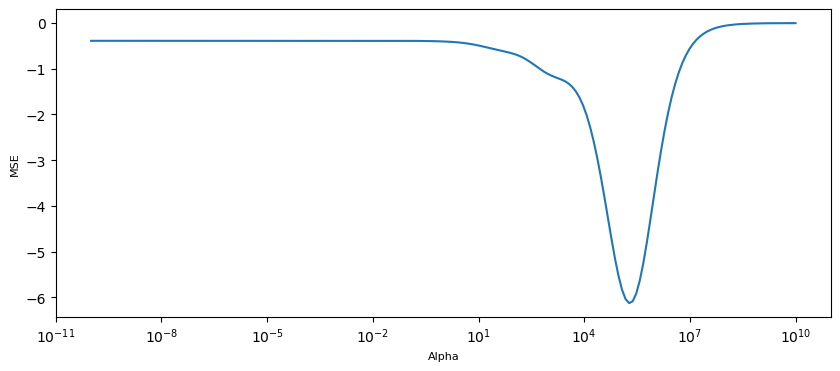

In [116]:
# plot cross validation MSE with respective alpha to understand if we have reached global minimum
ridge_cv_means = [np.mean(cv_mean) for cv_mean in ridge_cv.cv_values_.T]

fig = plt.figure(figsize=(10,4))
ax = plt.gca()
ax.semilogx(ridge_cv.alphas, ridge_cv_means)

plt.ylabel('MSE')
plt.xlabel('Alpha')

matplotlib.rc('xtick', labelsize=10)
matplotlib.rc('ytick', labelsize=10) 

ax.xaxis.label.set_size(8)
ax.yaxis.label.set_size(8);

In [117]:
# instantiate Ridge regression model with the best hyperparameter obtained by cross validation step
ridge = Ridge(alpha=ridge_cv.alpha_)

In [118]:
# fit the ridge model on training set:
model_l2 = ridge.fit(X_train_ss, y_train)

In [153]:
# find the R2 score for the training set:
print(f'R2 score for training set: {model_l2.score(X_train_ss, y_train)}')

R2 score for training set: 0.8882654411624934


In [161]:
# find the R2 score for the validation set:
print(f'R2 score for validation set: {model_l2.score(X_test_ss, y_test)}')

R2 score for validation set: 0.8866589570347541


In [119]:
# find the predicted y value for training set:
y_train_pred2 = model_l2.predict(X_train_ss) 

In [120]:
rmse_l2_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred2))

In [121]:
print(f'RMSE value for training set: {rmse_l2_train}')

RMSE value for training set: 47931.0966159553


In [122]:
# find the predicted y value for validation set:
y_test_pred2 = model_l2.predict(X_test_ss)

In [123]:
rmse_l2_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred2))

In [124]:
print(f'RMSE value for validation set: {rmse_l2_test}')

RMSE value for validation set: 48128.8608105506


#### Lasso Regression:

In [125]:
# instantiate lasso cross validation to find the best hyperparameter
lasso_cv = LassoCV(n_alphas=1000)
lasso_cv.fit(X_train_ss, y_train)

LassoCV(n_alphas=1000)

In [126]:
print(f'Best alpha for Lasso Regression: {lasso_cv.alpha_}') 

Best alpha for Lasso Regression: 93.89603273068234


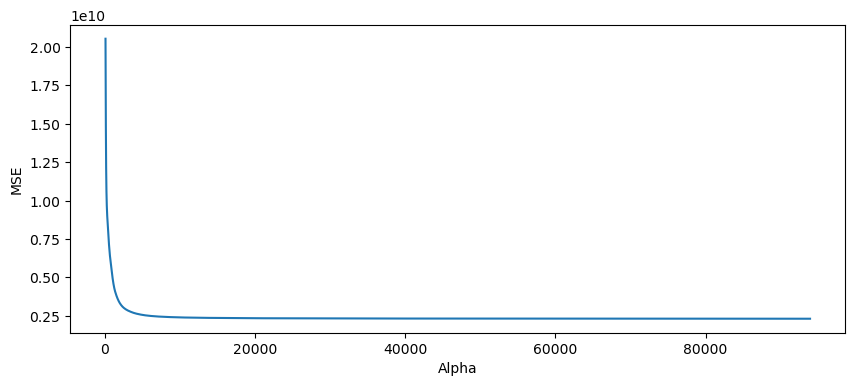

In [127]:
# plot cross validation MSE with respective alpha to understand if we have reached global minimum
lasso_cv_means = [np.mean(cv_alpha) for cv_alpha in lasso_cv.mse_path_]

fig = plt.figure(figsize=(10,4))
ax = plt.gca()
ax.plot(lasso_cv.alphas_, list(reversed(lasso_cv_means)))

plt.ylabel('MSE')
plt.xlabel('Alpha')

matplotlib.rc('xtick', labelsize=8)
matplotlib.rc('ytick', labelsize=8) 

ax.xaxis.label.set_size(10)
ax.yaxis.label.set_size(10)

In [128]:
# instantiate Lasso Regression model with the best hyperparameter obtained by cross validation step
lasso = Lasso(alpha=lasso_cv.alpha_)

In [129]:
# Train the model to the training data
model_l1 = lasso.fit(X_train_ss, y_train)

In [154]:
# find the R2 score for the training set:
print(f'R2 score for training set: {model_l1.score(X_train_ss, y_train)}')

R2 score for training set: 0.887552558877016


In [162]:
# find the R2 score for the validation set:
print(f'R2 score for training set: {model_l1.score(X_test_ss, y_test)}')

R2 score for training set: 0.8861078233977556


In [155]:
# find the predicted y value for training set:
y_train_pred1 = model_l1.predict(X_train_ss) 

In [156]:
rmse_l1_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred1))

In [157]:
print(f'RMSE value for training set: {rmse_l1_train}')

RMSE value for training set: 48083.757091366315


In [158]:
# find the predicted y value for validation set:
y_test_pred1 = model_l1.predict(X_test_ss)

In [159]:
rmse_l1_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred1))

In [160]:
print(f'RMSE value for validation set: {rmse_l1_test}')

RMSE value for validation set: 48245.73491829278


#### Elastic Net Regression:

In [163]:
# set L1 ratio value
l1_ratio = np.linspace(0.05, 0.95, 5)

In [164]:
# instantiate ElasticNet cross validation to find the best hyperparameter
enet_cv = ElasticNetCV(n_alphas=200, l1_ratio=l1_ratio)
enet_cv.fit(X_train_ss, y_train)

ElasticNetCV(l1_ratio=array([0.05 , 0.275, 0.5  , 0.725, 0.95 ]), n_alphas=200)

In [165]:
print(f'Best alpha for Lasso regression: {enet_cv.alpha_}')

Best alpha for Lasso regression: 98.83792919019196


In [166]:
# Instantiate Elastic Net regression model with the best hyperparameter obtained by cross validation step
enet = ElasticNet(alpha=enet_cv.alpha_, l1_ratio=enet_cv.l1_ratio_)

In [167]:
# train the Elastic Net model to the training data
model_en = enet.fit(X_train_ss, y_train)

In [168]:
# find the R2 score for the training set:
print(f'R2 score for training set: {model_en.score(X_train_ss, y_train)}')

R2 score for training set: 0.4944706000177559


In [169]:
# find the R2 score for the validation set:
print(f'R2 score for training set: {model_en.score(X_test_ss, y_test)}')

R2 score for training set: 0.4952582108676057


In [170]:
# find the predicted y value for training set:
y_train_pred_en = model_en.predict(X_train_ss)

In [171]:
# RMSE value for train data
rmse_en_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_en))

In [172]:
print(f'RMSE value for training set: {rmse_en_train}')

RMSE value for training set: 101952.25005204645


In [173]:
# find the predicted y value for validation set:
y_test_pred_en = model_en.predict(X_test_ss)

In [174]:
# RMSE value for val data
rmse_en_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_en))

In [175]:
print(f'RMSE value for validation set: {rmse_en_test}')

RMSE value for validation set: 101565.59364458353


# Model Evaluation

In [181]:
print("Results of Linear Model trainings are as follows: ")
print("1. Ridge Regression: ")
print(f"R2-score on training set: {round((model_l2.score(X_train_ss, y_train)),3)}")
print(f"R2-score on validation set: {round((model_l2.score(X_test_ss, y_test)),3)}")
print(f"RMSE on training set : {round(rmse_l2_train,1)}")
print(f"RMSE on validation set: {round(rmse_l2_test,1)}\n")
print("2. Lasso Regression: ")
print(f"R2-score on training set: {round((model_l1.score(X_train_ss, y_train)),3)}")
print(f"R2-score on validation set: {round((model_l1.score(X_test_ss, y_test)),3)}")
print(f"RMSE on training set : {round(rmse_l1_train,1)}")
print(f"RMSE on validation set: {round(rmse_l1_test,1)}\n")
print("3. ElasticNet Regression: ")
print(f"R2-score on training set: {round((model_en.score(X_train_ss, y_train)),3)}")
print(f"R2-score on validation set: {round((model_en.score(X_test_ss, y_test)),3)}")
print(f"RMSE on training set : {round(rmse_en_train,1)}")
print(f"RMSE on validation set: {round(rmse_en_test,1)}\n")

Results of Linear Model trainings are as follows: 
1. Ridge Regression: 
R2-score on training set: 0.888
R2-score on validation set: 0.887
RMSE on training set : 47931.1
RMSE on validation set: 48128.9

2. Lasso Regression: 
R2-score on training set: 0.888
R2-score on validation set: 0.886
RMSE on training set : 48083.8
RMSE on validation set: 48245.7

3. ElasticNet Regression: 
R2-score on training set: 0.494
R2-score on validation set: 0.495
RMSE on training set : 101952.3
RMSE on validation set: 101565.6



#### Ridge Regression appears to be performing best among regulisations. Let's find out how far are the predicted values away from the actual values for the training and validation sets.

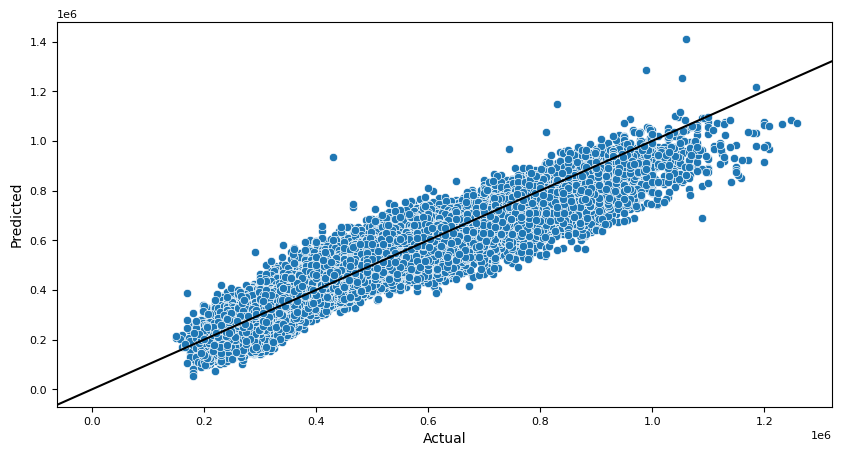

In [176]:
# scatter plot best model prediction results on training set:
fig,ax = plt.subplots(figsize=(10,5))
sns.scatterplot(
    y=y_train_pred2,
    x=y_train,
    ax=ax
)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.axline((0,0),(1,1),color='black')

matplotlib.rc('xtick', labelsize=7)
matplotlib.rc('ytick', labelsize=7) 

ax.xaxis.label.set_size(10)
ax.yaxis.label.set_size(10)

- For the training set, it is observed that the predicted values are largely centred along the y=x line, with only a few prediction outliers above the actual values.

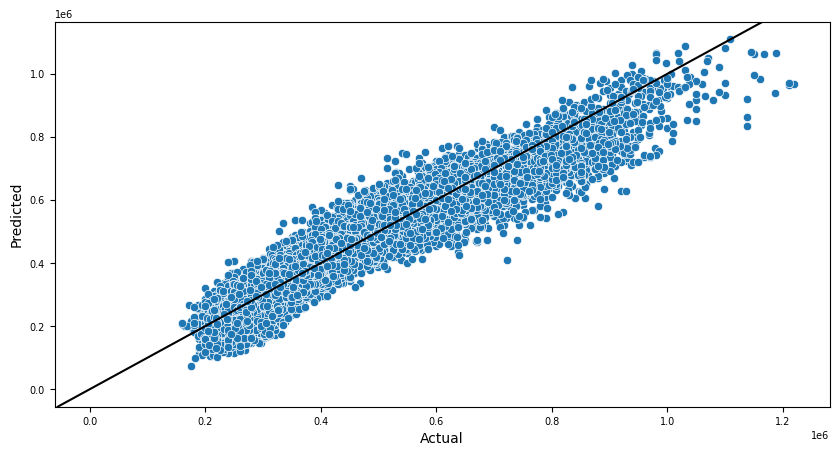

In [177]:
# scatter plot best model prediction results on validation set:
fig,ax = plt.subplots(figsize=(10,5))
sns.scatterplot(
    y=y_test_pred2,
    x=y_test,
    ax=ax
)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.axline((0,0),(1,1),color='black')

matplotlib.rc('xtick', labelsize=7)
matplotlib.rc('ytick', labelsize=7) 

ax.xaxis.label.set_size(10)
ax.yaxis.label.set_size(10);

- For the validation set, it is interesting to observe a few outliers of predicted values below the the actual values.
- In overall, the plots are closely fitting the y=x line. This indicate a good fittin of the model on the validation set.

# Prediction

In [178]:
df_pred.head(3)

,floor_area_sqm,lease_commence_date,Tranc_Year,Tranc_Month,mid_storey,max_floor_lvl,commercial,market_hawker,multistorey_carpark,precinct_pavilion,...,planning_area_Rochor,planning_area_Sembawang,planning_area_Sengkang,planning_area_Serangoon,planning_area_Tampines,planning_area_Tanglin,planning_area_Toa Payoh,planning_area_Western Water Catchment,planning_area_Woodlands,planning_area_Yishun
0,84.0,1987,2012,11,8,12,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,112.0,2008,2019,8,5,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,68.0,1980,2013,10,8,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [184]:
# apply scaling on X variables:
X_pred_ss = ss.transform(df_pred)

In [185]:
# perform prediction based on the best model 
y_pred_final = pd.Series(model_l2.predict(X_pred_ss), name='resale_price')

In [187]:
# open the original prediction data with transaction id:
df_ori = pd.read_csv('../datasets/test.csv')

C:\Users\daphn\AppData\Local\Temp\ipykernel_9928\2462497526.py:1: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ori = pd.read_csv('../datasets/test.csv')


In [189]:
# create a dataframe for the result with the corresponding transaction id:
y_result = pd.concat([df_ori['id'], y_pred_final], axis=1)

In [197]:
# save the dataframe to csv file:
y_result.to_csv('../datasets/result.csv')